Import Lib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier 

import warnings
warnings.filterwarnings('ignore')

Load the data

In [2]:
df = pd.read_csv('../wineQ.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [4]:
df[['type','quality']].value_counts()

type   quality
white  6          2198
       5          1457
       7           880
red    5           681
       6           638
       7           199
white  8           175
       4           163
red    4            53
white  3            20
red    8            18
       3            10
white  9             5
Name: count, dtype: int64

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
df.describe(include='O')

,type
count,6497
unique,2
top,white
freq,4898


In [7]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
df.describe().T # transpose the output(T)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [10]:
# Mate data

print(f"Columns Name - {df.columns.to_list()}")
print(f"Data Types - {df.dtypes}")
print(f"Number of Rows - {df.shape[0]}")
print(f"Number of Columns - {df.shape[1]}")

Columns Name - ['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Data Types - type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
Number of Rows - 6497
Number of Columns - 13


EDA

In [11]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [12]:
# Handel Missing Values
# One by One Features
df['fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].median())

In [13]:
# Handel Missing Values
# All Fratures at onces
for i in df.columns:
    if df[i].isna().sum() >0:
        df[i] = df[i].fillna(df[i].median())

In [14]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

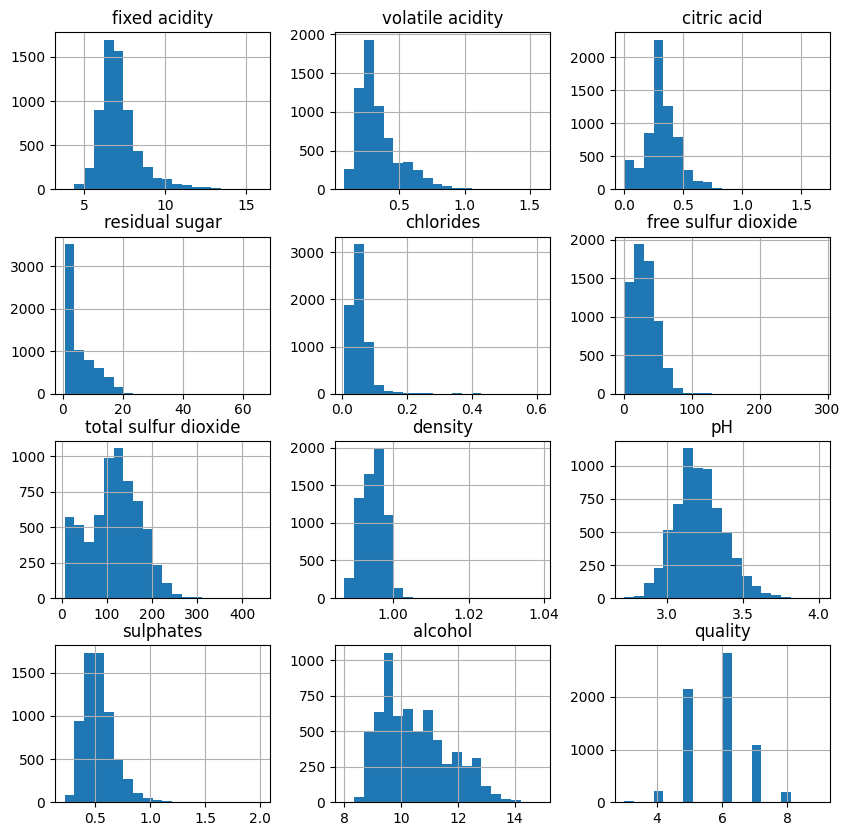

In [15]:
# Look at the distibution of data using Histogram

df.hist(bins=20,figsize=(10,10))
plt.show()

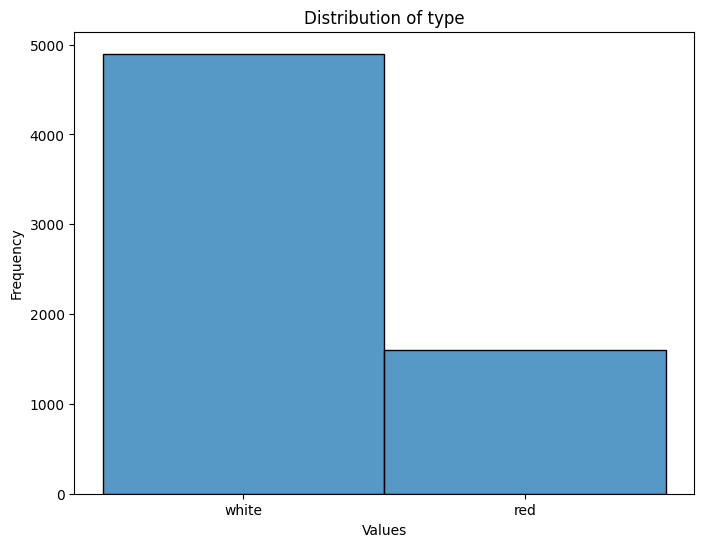

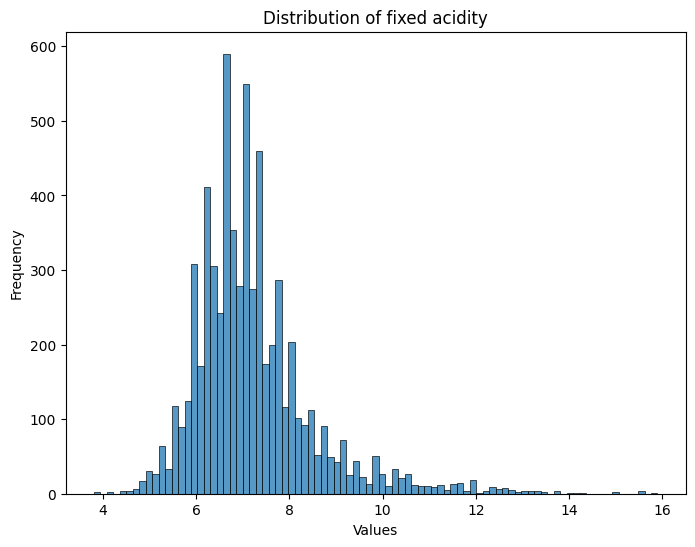

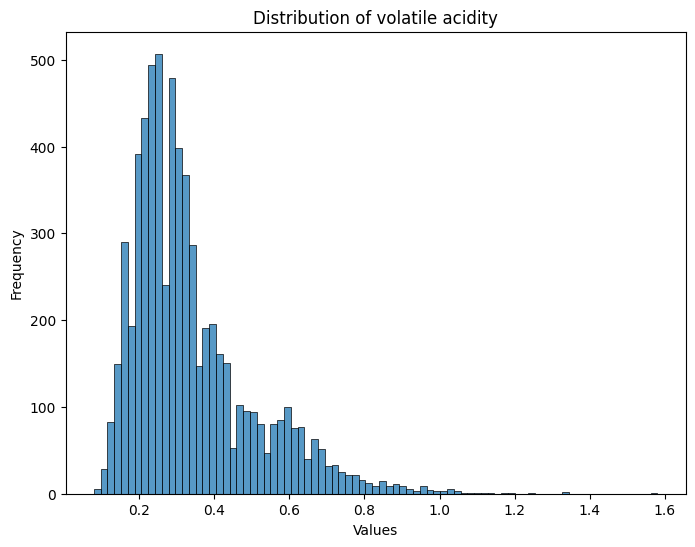

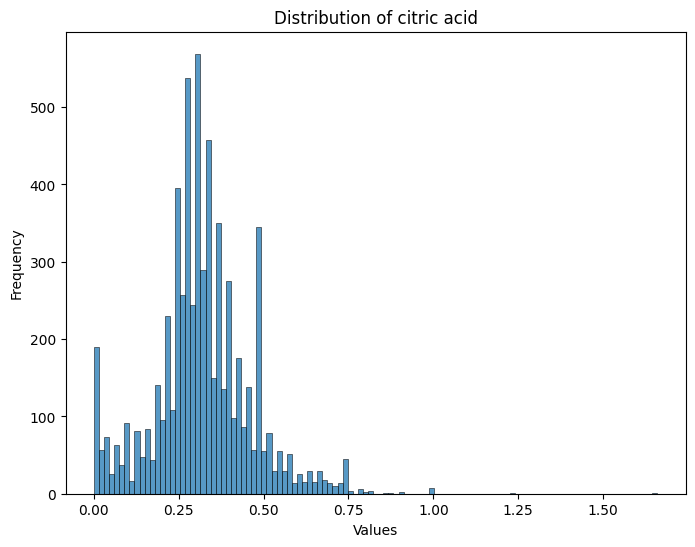

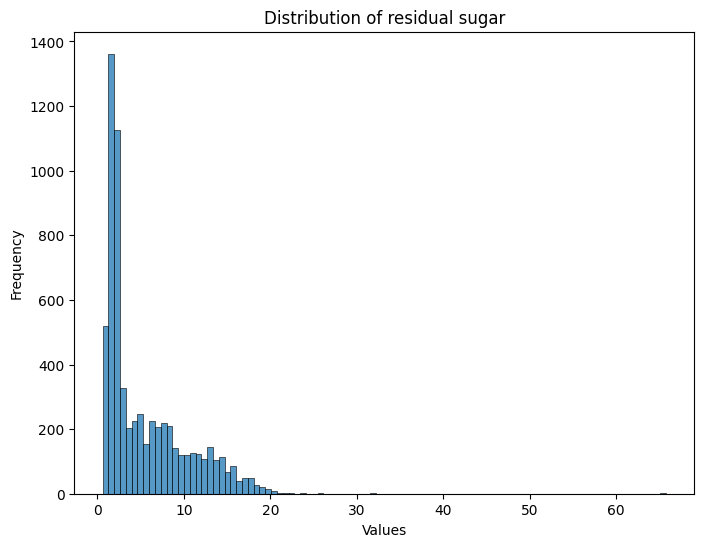

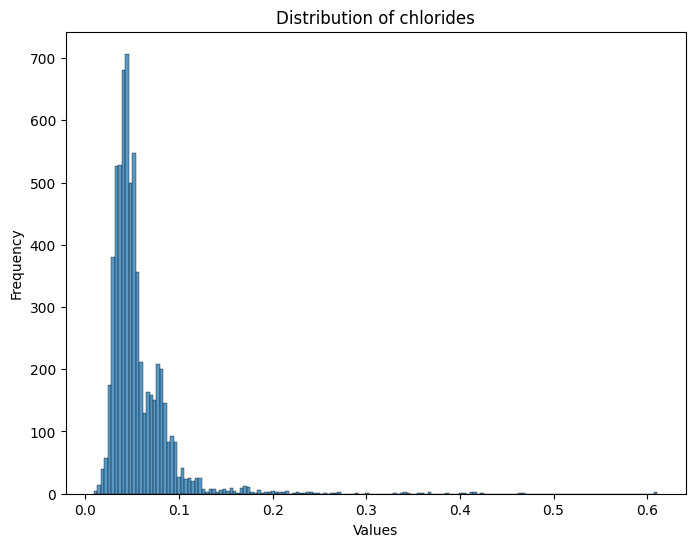

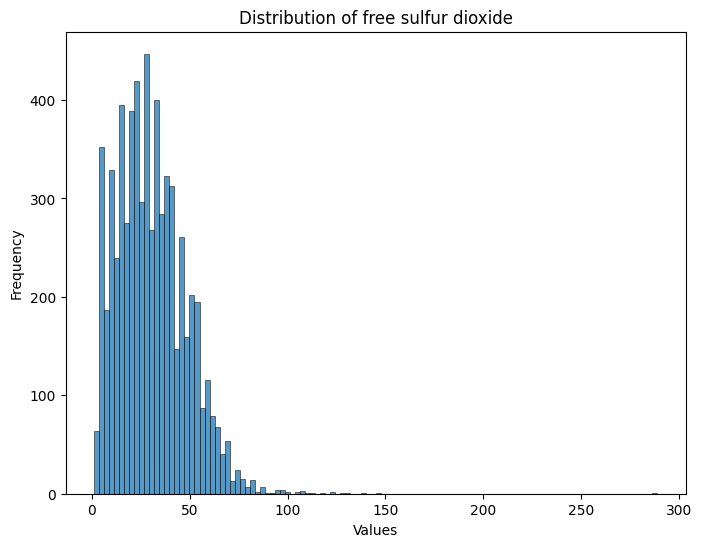

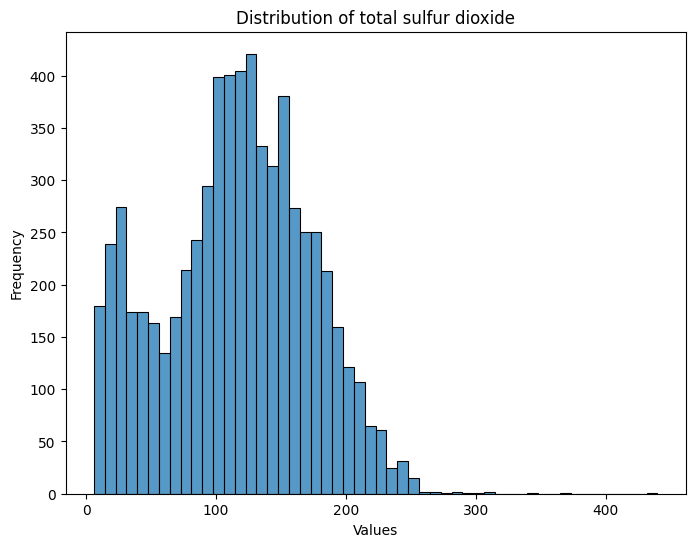

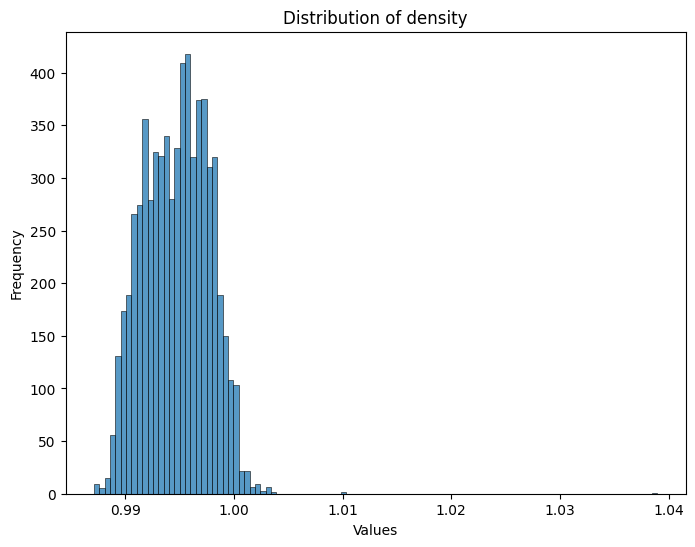

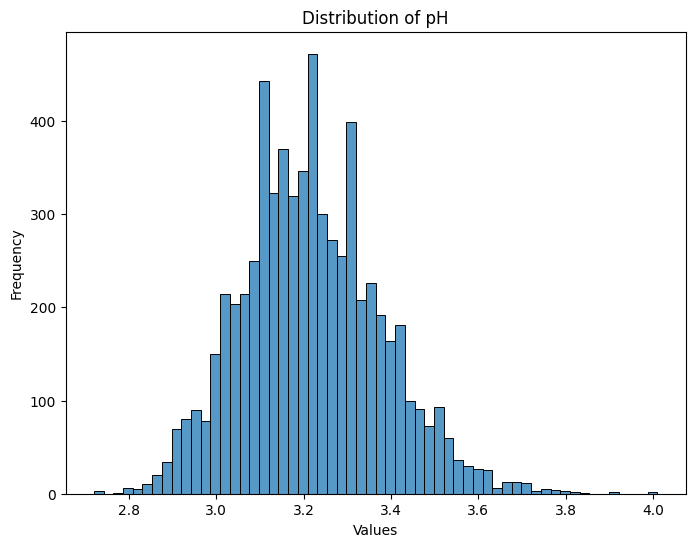

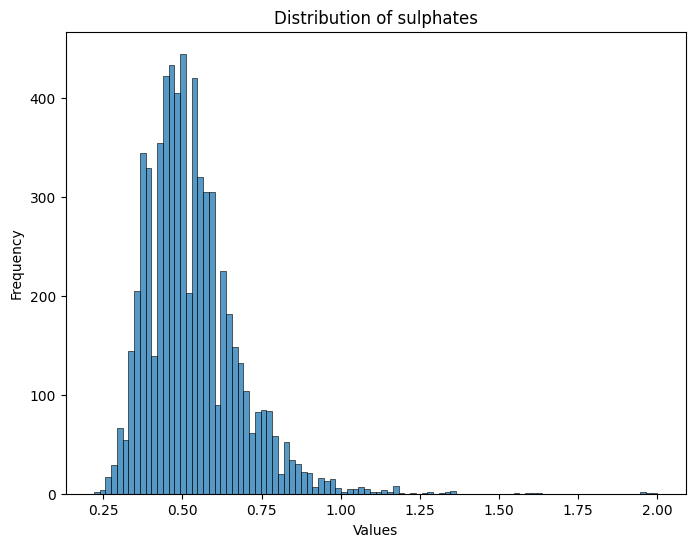

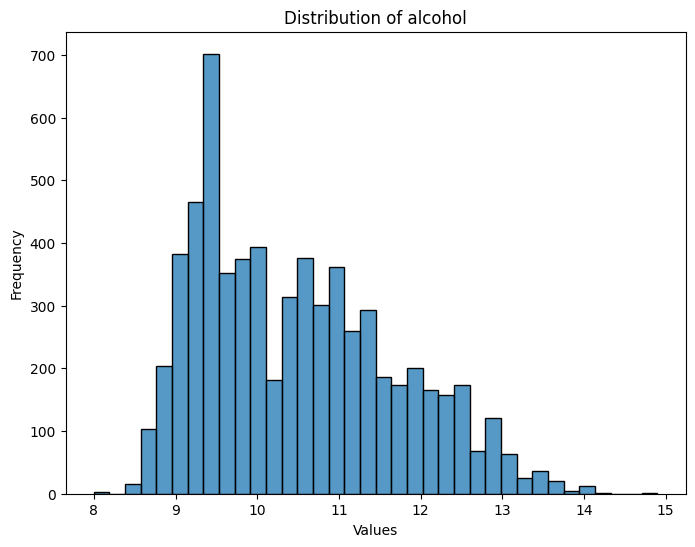

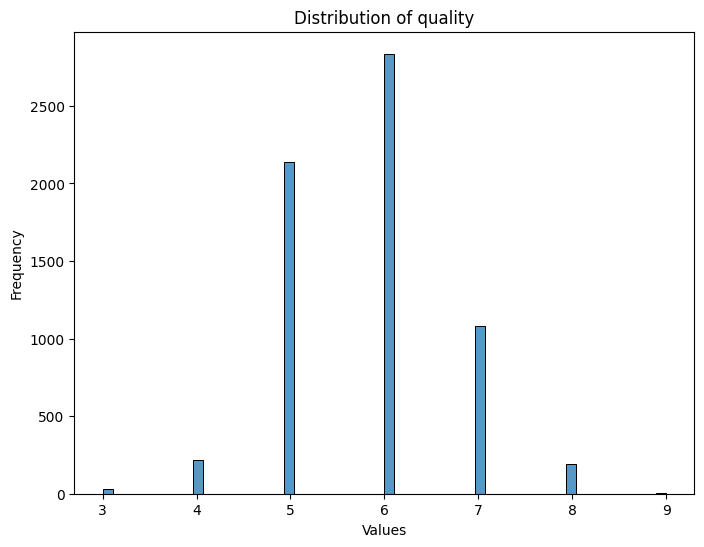

In [16]:
for name, value in df.items():
    plt.figure(figsize=(8, 6))
    sns.histplot(value)
    # Set the title and labels
    plt.title(f'Distribution of {name}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

In [17]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [19]:
df['quality'] = df['quality'].apply(lambda x:str(x))

<Axes: xlabel='quality', ylabel='alcohol'>

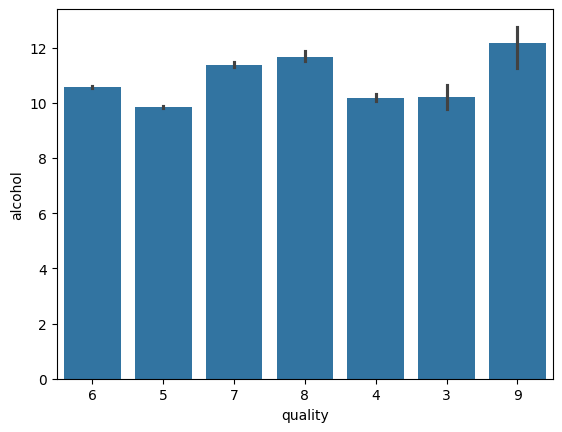

In [20]:
sns.barplot(data=df,y='alcohol',x='quality')

<Axes: xlabel='quality', ylabel='fixed acidity'>

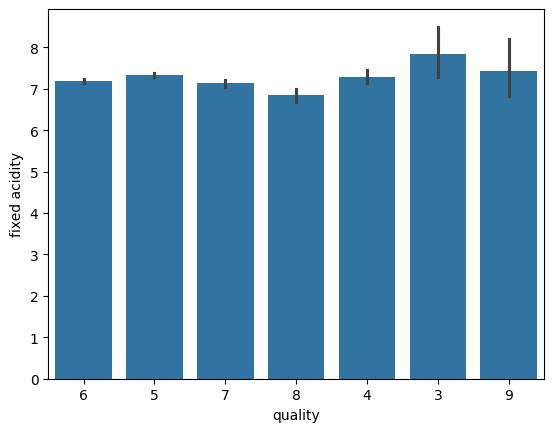

In [21]:
list = df[['fixed acidity', 'volatile acidity', 'citric acid',
      'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]


sns.barplot(data=df,x='quality',y='fixed acidity')

<Axes: xlabel='quality', ylabel='volatile acidity'>

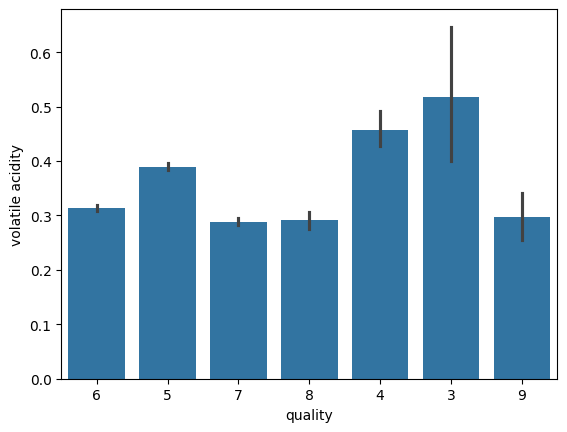

In [22]:
sns.barplot(data=df,x='quality',y='volatile acidity')

<Axes: xlabel='quality', ylabel='citric acid'>

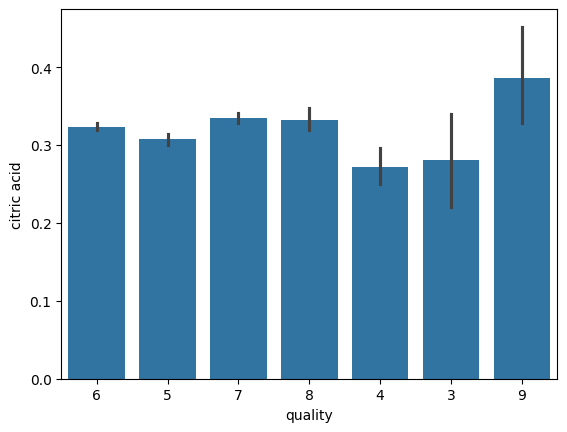

In [23]:
sns.barplot(data=df,x='quality',y='citric acid')

<Axes: xlabel='quality', ylabel='residual sugar'>

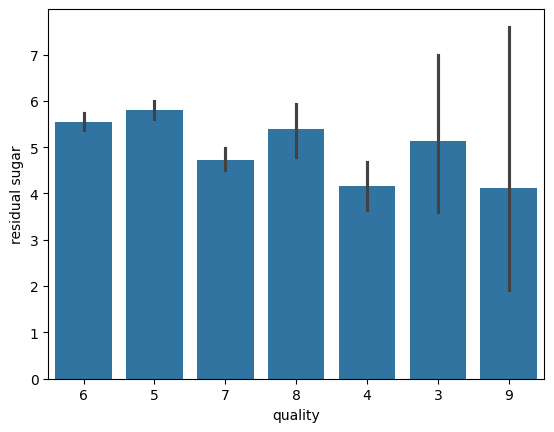

In [24]:
sns.barplot(data=df,x='quality',y='residual sugar')

<Axes: xlabel='quality', ylabel='chlorides'>

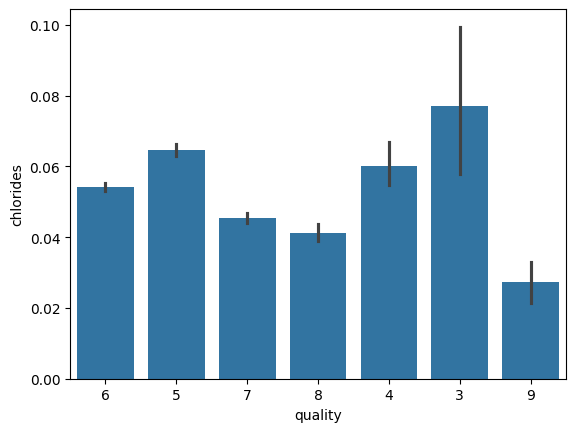

In [25]:
sns.barplot(data=df,x='quality',y='chlorides')

In [18]:
# convert object to num

df = pd.get_dummies(df,columns=['type'],drop_first=True,dtype='int')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [19]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
fixed acidity,1.000000,0.219872,0.323498,-0.112194,0.298249,-0.283164,-0.329421,0.458943,-0.251750,0.300198,-0.095561,-0.076931,-0.486930
volatile acidity,0.219872,1.000000,-0.377827,-0.196275,0.377141,-0.353016,-0.414857,0.271144,0.260459,0.225160,-0.038083,-0.265901,-0.652674
citric acid,0.323498,-0.377827,1.000000,0.142411,0.039247,0.133412,0.195137,0.096294,-0.328371,0.057651,-0.010418,0.085704,0.187078
residual sugar,-0.112194,-0.196275,0.142411,1.000000,-0.128891,0.402978,0.495545,0.552520,-0.266779,-0.185715,-0.359503,-0.036941,0.348878
chlorides,0.298249,0.377141,0.039247,-0.128891,1.000000,-0.194973,-0.279565,0.362590,0.044881,0.395158,-0.256862,-0.200742,-0.512636
free sulfur dioxide,-0.283164,-0.353016,0.133412,0.402978,-0.194973,1.000000,0.720934,0.025717,-0.145112,-0.188470,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329421,-0.414857,0.195137,0.495545,-0.279565,0.720934,1.000000,0.032395,-0.237511,-0.275256,-0.265740,-0.041385,0.700357
density,0.458943,0.271144,0.096294,0.552520,0.362590,0.025717,0.032395,1.000000,0.011919,0.259414,-0.686745,-0.305858,-0.390645
pH,-0.251750,0.260459,-0.328371,-0.266779,0.044881,-0.145112,-0.237511,0.011919,1.000000,0.190957,0.120949,0.019350,-0.328517
sulphates,0.300198,0.225160,0.057651,-0.185715,0.395158,-0.188470,-0.275256,0.259414,0.190957,1.000000,-0.003261,0.038770,-0.486607


<Axes: >

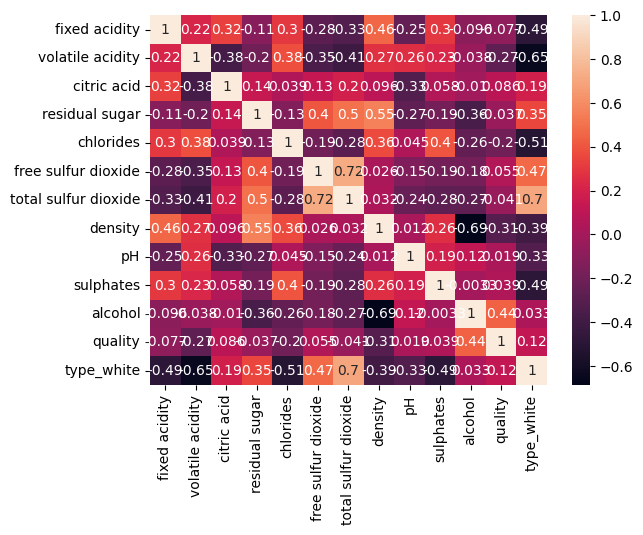

In [20]:
sns.heatmap(df.corr(),annot=True)

Here we can see free/total sulfur dioxide both are highly colinear to eachother, so we have to drop one we can drop total sulfur dioxide becuase it is also highly colinear with type which mean it can be biased because in type white wine have more recordes then red

In [21]:
df = df.drop("total sulfur dioxide",axis=1)
df.shape

(6497, 12)

In [22]:
# let convert the problem of multi class to binary classification

df['quality'] = [1 if x>5 else 0 for x in df.quality]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,1,1
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,1,1
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,1,1
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,0,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.51,11.2,1,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,1,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,0,0


In [23]:
features = df.drop(['quality'], axis=1)
target = df['quality']
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)

In [24]:
xtrain.shape, xtest.shape

((5197, 11), (1300, 11))

In [25]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [27]:
models = [LogisticRegression(), SVC(kernel='rbf'), SVC(kernel='linear')]

for i in range(3):
    models[i].fit(xtrain, ytrain)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.7027810651830071
Validation Accuracy :  0.6949995402580684

SVC() : 
Training Accuracy :  0.7082288310128588
Validation Accuracy :  0.6964017531492322

SVC(kernel='linear') : 
Training Accuracy :  0.6987517063093227
Validation Accuracy :  0.6889999080516138

